This project will look to see if there is a relationship between the speed of cars and the distance taken to stop.

<img src="pics/image.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
myData = pd.read_csv('data/mycar.csv')

In [4]:
myData

,Speed,Stopping_dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [5]:
X = myData.iloc[:,:-1].values
X

array([[ 4],
       [ 4],
       [ 7],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [10],
       [10],
       [11],
       [11],
       [12],
       [12],
       [12],
       [12],
       [13],
       [13],
       [13],
       [13],
       [14],
       [14],
       [14],
       [14],
       [15],
       [15],
       [15],
       [16],
       [16],
       [17],
       [17],
       [17],
       [18],
       [18],
       [18],
       [18],
       [19],
       [19],
       [19],
       [20],
       [20],
       [20],
       [20],
       [20],
       [22],
       [23],
       [24],
       [24],
       [24],
       [25]])

In [6]:
Y = myData.iloc[:,1].values
Y

array([ 2, 10,  4, 22, 16, 10, 18, 26, 34, 17, 28, 14, 20, 24, 28, 26, 34,
       34, 46, 26, 36, 60, 80, 20, 26, 54, 32, 40, 32, 40, 50, 42, 56, 76,
       84, 36, 46, 68, 32, 48, 52, 56, 64, 66, 54, 70, 92, 93, 85])

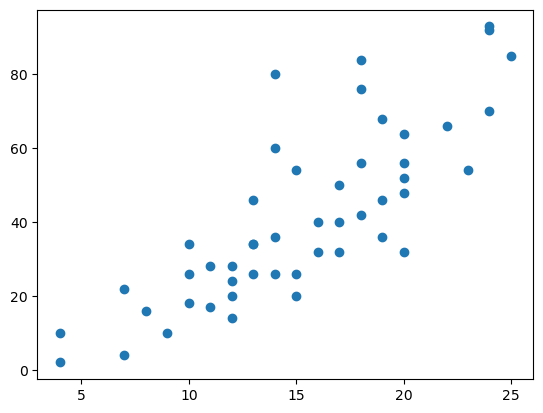

In [7]:
plt.scatter(X,Y)
plt.show()

In [7]:
myData.corr()

,Speed,Stopping_dist
Speed,1.000000,0.804632
Stopping_dist,0.804632,1.000000


<Axes: >

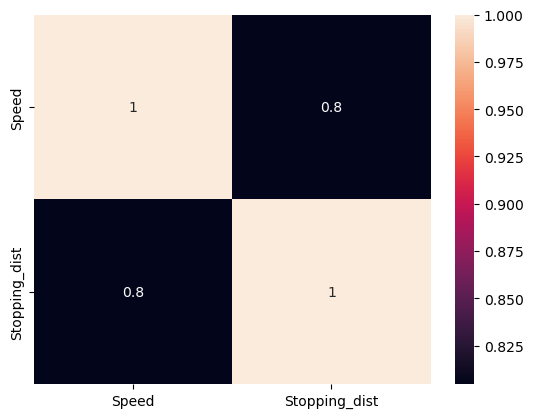

In [8]:
# sns plot for correlation
sns.heatmap(myData.corr(), annot=True)

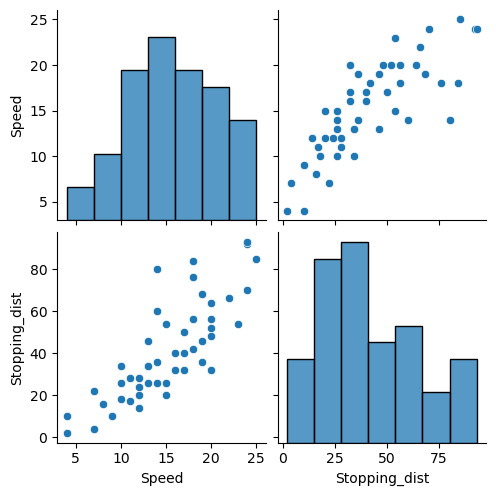

In [9]:
# sns pairplot
sns.pairplot(myData)

<Axes: xlabel='Speed', ylabel='Stopping_dist'>

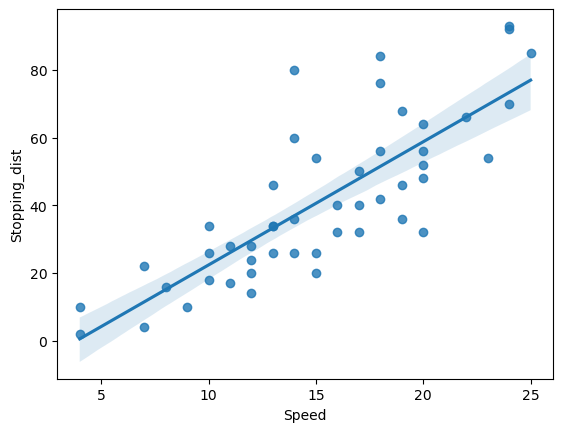

In [16]:
# sns regplot
sns.regplot(x='Speed', y='Stopping_dist', data=myData)

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)

### Regression - Modeling

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
myModel = LinearRegression()

myModel.fit(X_train,Y_train)

LinearRegression()

In [21]:
myModel.coef_  # Coefficient

array([3.56656091])

In [22]:
myModel.intercept_  # intercept

-12.92201776649744

### Predict

In [23]:
y_pred = myModel.predict(X_test)
y_pred

array([33.44327411, 65.54232234, 72.67544416, 72.67544416, 22.74359137,
       47.70951777, 29.8767132 , 58.40920051, 47.70951777, 58.40920051,
       26.31015228, 54.84263959, 51.27607868, 47.70951777, 44.14295685])

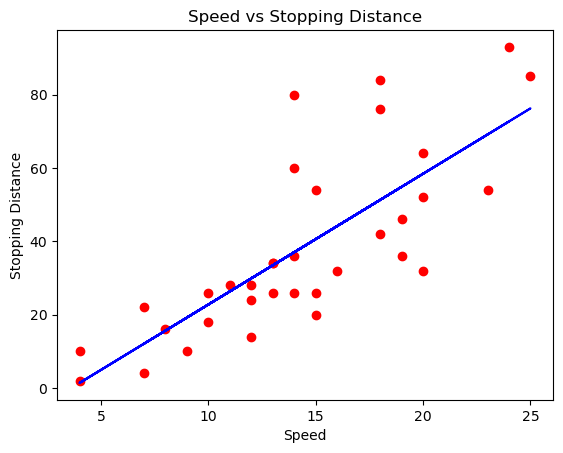

In [24]:
plt.scatter(X_train,Y_train, color='r')
plt.plot(X_train,myModel.predict(X_train), color='b')
plt.title('Speed vs Stopping Distance')
plt.xlabel('Speed')
plt.ylabel('Stopping Distance')
plt.show()

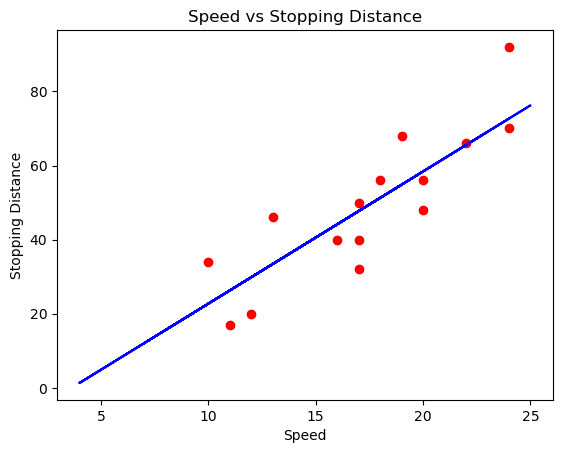

In [25]:
plt.scatter(X_test,Y_test, color='r')
plt.plot(X_train,myModel.predict(X_train), color='b')
plt.title('Speed vs Stopping Distance')
plt.xlabel('Speed')
plt.ylabel('Stopping Distance')
plt.show()